Universidad Galileo  
Maestría en Data Science  
Statistical Learning II
Sección U  


   # **Proyecto: Parte 3 - RNN**


<p style="text-align: right;">
Henry Giovanni<br/>
Barrientos García<br/>
21001538<br/>
Guatemala, 24 de septiembre de 2021<br/>
</p>

# Primera parte - Recurrent Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.
C:\Users\hbarrientosg\Anaconda3\envs\TareasSLII\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hbarrientosg\Anaconda3\envs\TareasSLII\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hbarrientosg\Anaconda3\envs\TareasSLII\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hb

In [2]:
dataset = pd.read_csv('nflx.us.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,NFLX
2006-01-04,82.20,82.50,81.33,81.95,9840600,NFLX
2006-01-05,81.40,82.90,81.00,82.50,7213500,NFLX
2006-01-06,83.95,85.03,83.41,84.95,8197400,NFLX
2006-01-09,84.10,84.25,83.38,83.73,6858200,NFLX


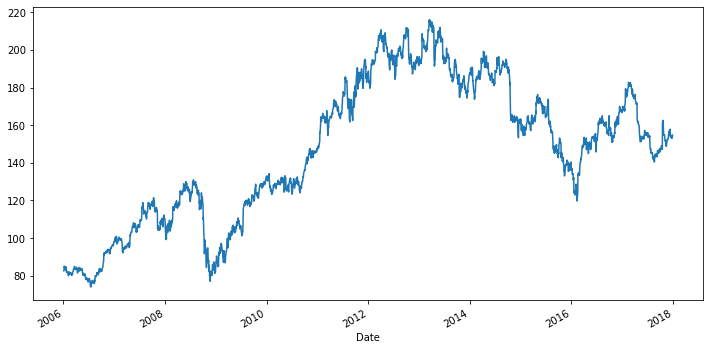

In [3]:
dataset["High"].plot(figsize=(12,6))

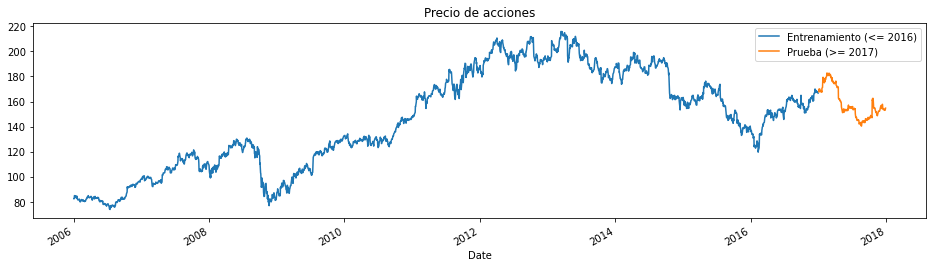

In [4]:
dataset["High"][:'2016'].plot(figsize=(16,4), legend=True)
dataset["High"]['2017':].plot(figsize=(16,4), legend=True)
plt.legend(['Entrenamiento (<= 2016)', 'Prueba (>= 2017)'])
plt.title('Precio de acciones')
plt.show()

In [5]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_set = scaler.fit_transform(training_set)

In [7]:
x_train = [scaled_set[i-60:i,0] for i in range(60,2769)]
y_train = [scaled_set[i,0] for i in range(60,2769)]
x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Modelo y entrenamiento

In [9]:
sequential = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1) #output
])

sequential.compile(optimizer='rmsprop', 
                   loss='mean_squared_error', 
                   metrics=['accuracy'])
history = sequential.fit(x_train, y_train, epochs=75, batch_size=50)


Epoch 1/75
2709/2709 [==============================] - 19s 7ms/step - loss: 0.0269 - accuracy: 7.3828e-04
Epoch 2/75
2709/2709 [==============================] - 15s 6ms/step - loss: 0.0125 - accuracy: 7.3828e-04
Epoch 3/75
2709/2709 [==============================] - 15s 5ms/step - loss: 0.0102 - accuracy: 7.3828e-04
Epoch 4/75
2709/2709 [==============================] - 14s 5ms/step - loss: 0.0093 - accuracy: 7.3828e-04
Epoch 5/75
2709/2709 [==============================] - 14s 5ms/step - loss: 0.0087 - accuracy: 7.3828e-04
Epoch 6/75
2709/2709 [==============================] - 14s 5ms/step - loss: 0.0070 - accuracy: 7.3828e-04
Epoch 7/75
2709/2709 [==============================] - 19s 7ms/step - loss: 0.0064 - accuracy: 7.3828e-04
Epoch 8/75
2709/2709 [==============================] - 16s 6ms/step - loss: 0.0055 - accuracy: 7.3828e-04
Epoch 9/75
2709/2709 [==============================] - 16s 6ms/step - loss: 0.0059 - accuracy: 7.3828e-04
Epoch 10/75
2709/2709 [=============

2709/2709 [==============================] - 15s 5ms/step - loss: 0.0014 - accuracy: 7.3828e-04
Epoch 75/75
2709/2709 [==============================] - 15s 6ms/step - loss: 0.0013 - accuracy: 7.3828e-04


In [10]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

## Predicción

In [11]:
x_test = np.array([inputs[i-60:i,0] for i in range(60,311)])
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
predicted_sp = sequential.predict(x_test)
predicted_sp = scaler.inverse_transform(predicted_sp)

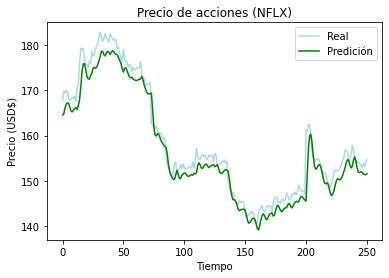

In [12]:
plt.plot(test_set, color='lightblue', label='Real')
plt.plot(predicted_sp, color='green', label='Predición')
plt.title('Precio de acciones (NFLX)')
plt.xlabel('Tiempo')
plt.ylabel('Precio (USD$)')
plt.legend()
plt.show()  

In [13]:
RMSE = math.sqrt(mean_squared_error(test_set, predicted_sp))
print("El valor de la metrica RMSE es: {}.".format(RMSE))

El valor de la metrica RMSE es: 2.776896060818079.


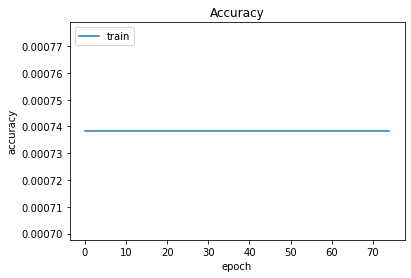

In [14]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()